In [12]:
import imp
import data_preparation
imp.reload(data_preparation)

<module 'data_preparation' from '/Users/gianluca/Developer/workspace/Python/tesi_emma/data_preparation.py'>

In [13]:
df, df_sdt, ents_srt, exts_srt, means, stds, ents, entropy = data_preparation.get()

Dataframe size:  (3330, 37)
Purged dataframe size:  (3210, 37)
Dropping demo-num-have_ig because it's constant
Dropping bool-does_follow_infl because it's constant
studente
diploma superiore e diploma tecnico 
scuola fatta in argentina 
sto ancora studiando 
phd
studentessa
make up artist
phd 


In [14]:
df.head()

,age,studies,gender,ig_since,ig_time_daily,follow_friends,share_stuff,follow_infl,follow_brands,follow_vips,...,wom,friends,explore,interests,travel,fashion,fitness,food,tech,beauty
4,1,2,1,1,1,4,2,2,3,3,...,0,1,1,0,1,0,0,0,1,0
6,1,2,0,1,1,4,2,4,3,3,...,0,1,0,1,0,1,0,0,0,1
7,1,3,0,2,2,3,2,4,2,4,...,1,1,0,0,1,1,0,0,0,0
8,1,3,0,1,1,4,2,3,2,3,...,0,0,1,0,0,1,0,1,0,0
11,1,3,0,2,0,4,2,4,3,2,...,1,0,0,0,0,1,0,0,0,1


In [15]:
df_sdt.head()

,age,studies,gender,ig_since,ig_time_daily,follow_friends,share_stuff,follow_infl,follow_brands,follow_vips,...,wom,friends,explore,interests,travel,fashion,fitness,food,tech,beauty
4,0.5,0.500000,0.5,0.333333,0.333333,1.000000,0.333333,0.333333,0.666667,0.666667,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.5,0.500000,0.0,0.333333,0.333333,1.000000,0.333333,1.000000,0.666667,0.666667,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.5,0.666667,0.0,0.666667,0.666667,0.666667,0.333333,1.000000,0.333333,1.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,0.5,0.666667,0.0,0.333333,0.333333,1.000000,0.333333,0.666667,0.333333,0.666667,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11,0.5,0.666667,0.0,0.666667,0.000000,1.000000,0.333333,1.000000,0.666667,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Plot demographics data:

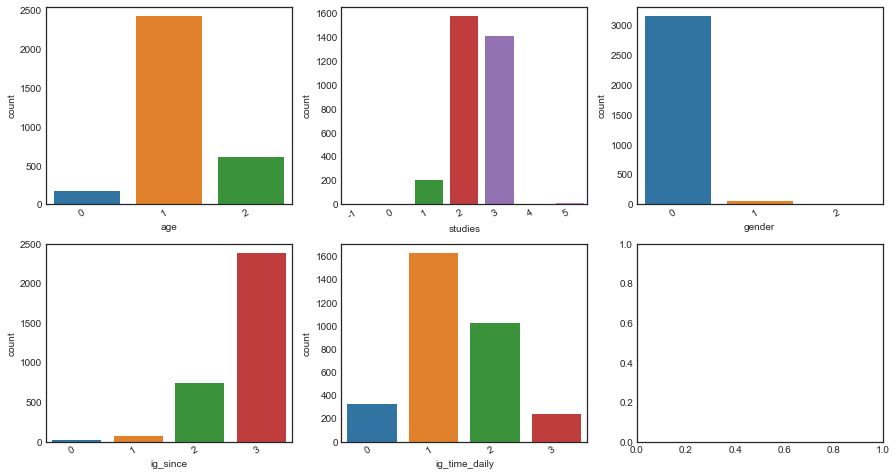

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')

demo_df = df[[c for c in df.columns.values[:5]]]
rows = int(demo_df.shape[1]/3)+(demo_df.shape[1]%3>0)
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(15,8))
answer = 0
for row in range(rows):
    for col in range(cols):
        if answer == demo_df.shape[1]:
            break
        sns.countplot(demo_df[demo_df.columns.values[answer]], ax=ax[row, col])
        plt.setp(ax[row, col].get_xticklabels(), rotation=30, horizontalalignment='right')
        answer += 1

In [17]:
print("Least 5 controversial questions:")
for ex in ents_srt[:5]:
    print("\t{} -> {} [{}]".format(ex[0], round(means[ex[0]], 2), round(ex[1], 2)))
    
print()
print("Top 5 controversial questions:")
for ex in ents_srt[-5:]:
    print("\t{} -> {} [{}]".format(ex[0], round(means[ex[0]], 2), round(ex[1], 2)))

print()
print("5 closest to extremes questions:")
for ex in exts_srt[-5:]:
    print("\t{} -> {} [{}]".format(ex[0], round(means[ex[0]], 2), round(ex[1], 2)))

Least 5 controversial questions:
	gender -> 0.02 [0.1]
	many_followers -> 1.16 [0.45]
	wannabe_infl -> 1.25 [0.6]
	everybody_does -> 1.29 [0.68]
	ig_since -> 2.7 [0.68]

Top 5 controversial questions:
	follow_brands -> 2.79 [1.25]
	cross_information -> 2.67 [1.26]
	brand_tips -> 2.73 [1.3]
	referral -> 2.23 [1.33]
	infl_followers -> 435064.73 [2.57]

5 closest to extremes questions:
	direct_brand_communication -> 1.47 [0.77]
	do_referral_brand -> 1.41 [0.79]
	everybody_does -> 1.29 [0.86]
	wannabe_infl -> 1.25 [0.88]
	many_followers -> 1.16 [0.92]


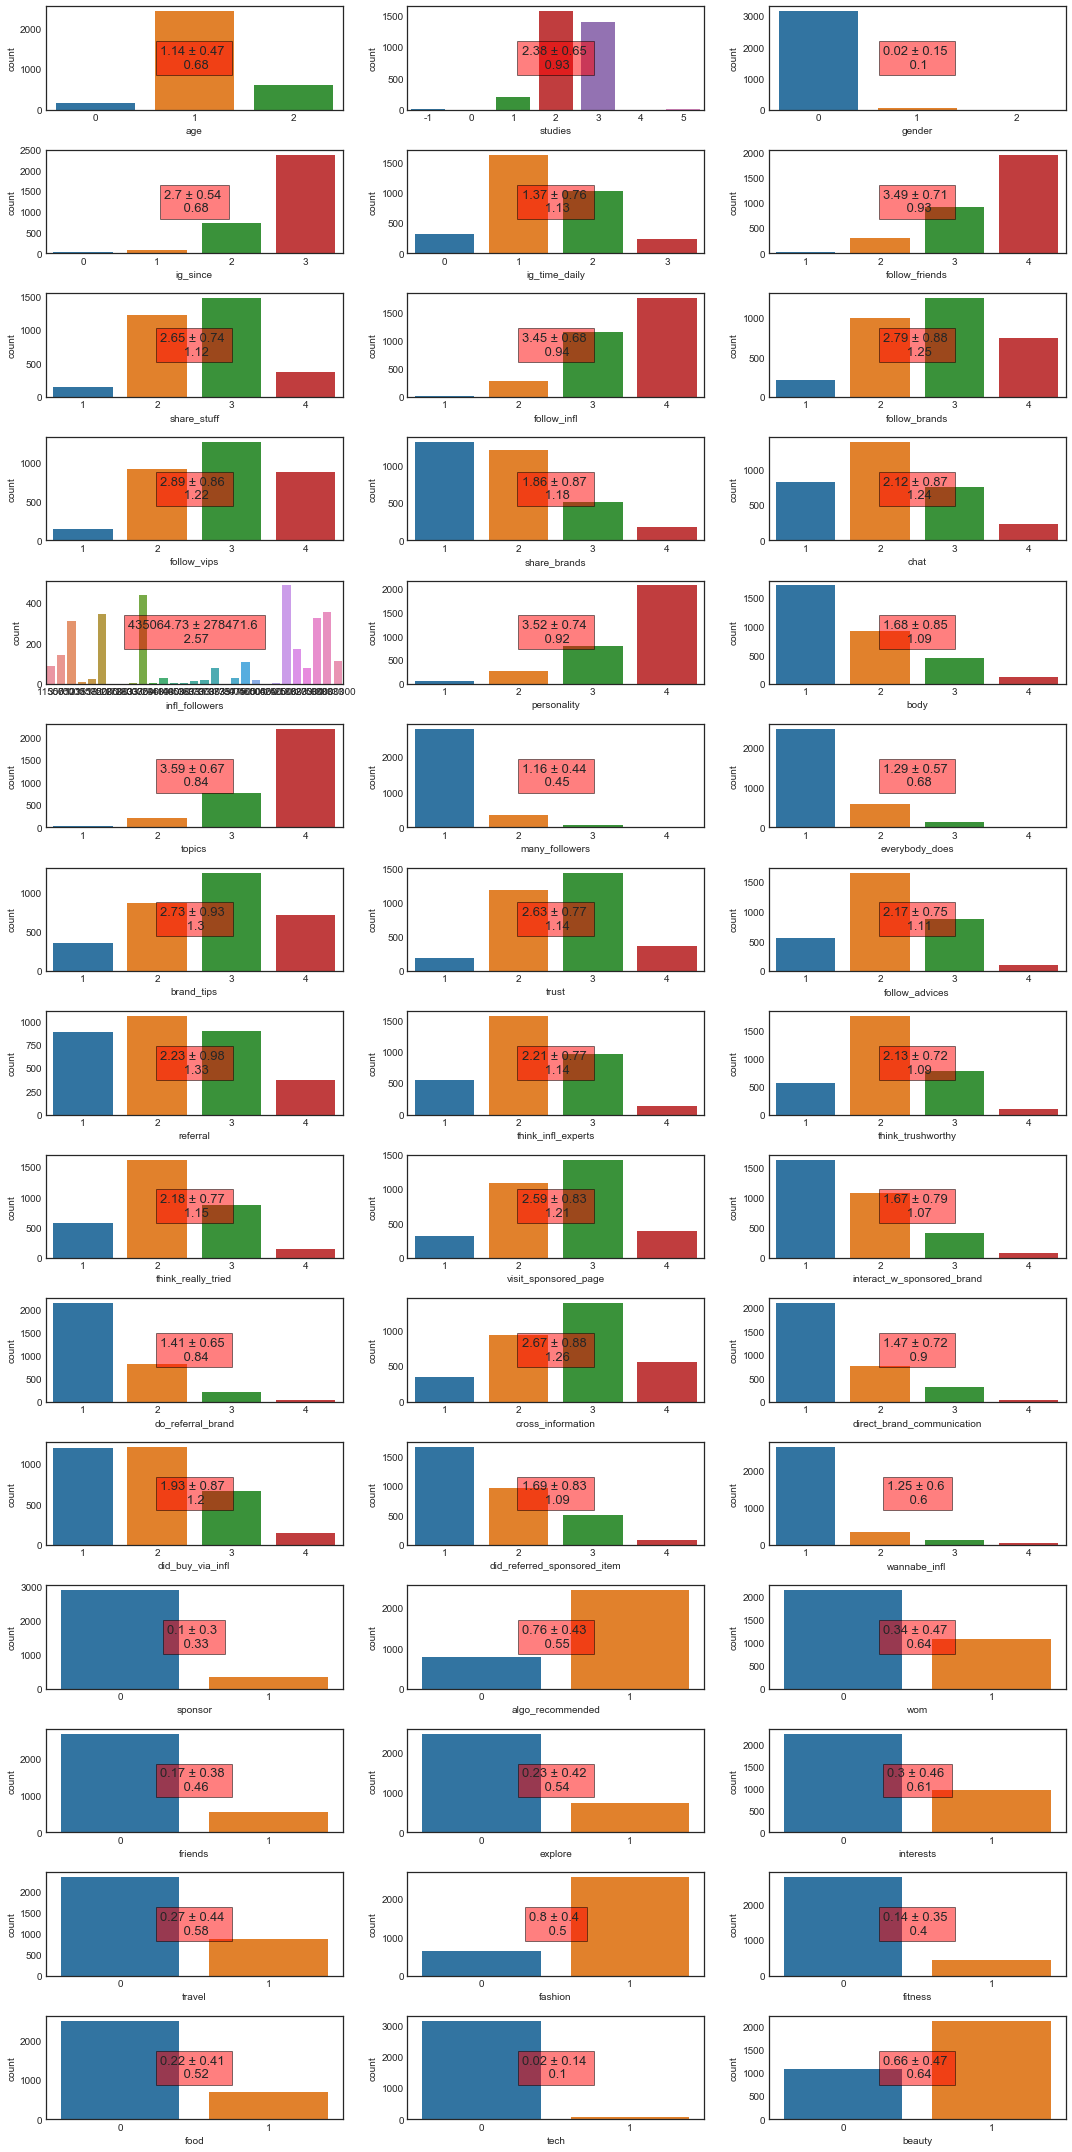

In [18]:
# Plot the whole thing

# Shortcut
# df.hist(figsize=(15, 30), bins=50, xlabelsize=8, ylabelsize=8);
# plt.tight_layout()

rows = int(df.shape[1]/3)+(df.shape[1]%3>0)
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(15,30))
answer = 0
for row in range(rows):
    for col in range(cols):
        if (answer == df.shape[1]):
            break
        feature_name = df.columns.values[answer]
        cc = df[feature_name]
        # For distribution -> sns.distplot(cc, ax=ax[row, col])
        sns.countplot(cc, ax=ax[row, col])
        if (answer < len(ents)):
            box_content = "{} ± {} \n {}".format(
                round(means[feature_name], 2),
                round(stds[feature_name], 2),
                round(ents[feature_name], 2)
            )
        else:
            box_content = "{} ± {} \n {}".format(
                round(cc.mean(), 2),
                round(cc.std(), 2),
                round(entropy(cc.values), 2)
            )
        ax[row, col].text(0.5, 0.5, box_content, 
                          fontsize=13, 
                          horizontalalignment='center', 
                          verticalalignment='center', 
                          transform=ax[row, col].transAxes,
                          bbox=dict(facecolor='red', alpha=0.5))
        answer += 1
        
fig.tight_layout()

<Figure size 2160x2160 with 0 Axes>

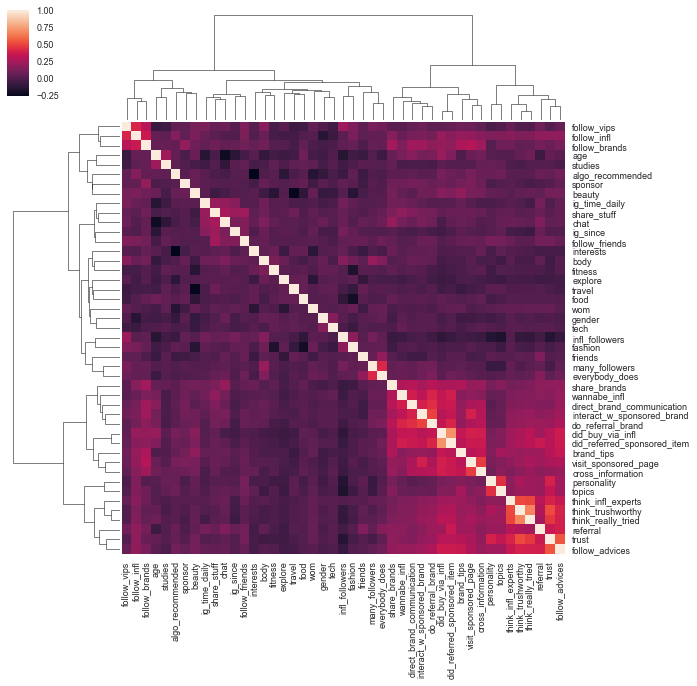

In [19]:
corr = df.corr() 
sns.set(font_scale=0.9)
plt.figure(figsize=(30, 30));
sns.clustermap(data=corr, annot_kws={"size": 10}, method="ward", yticklabels=True, xticklabels=True);
plt.tight_layout()

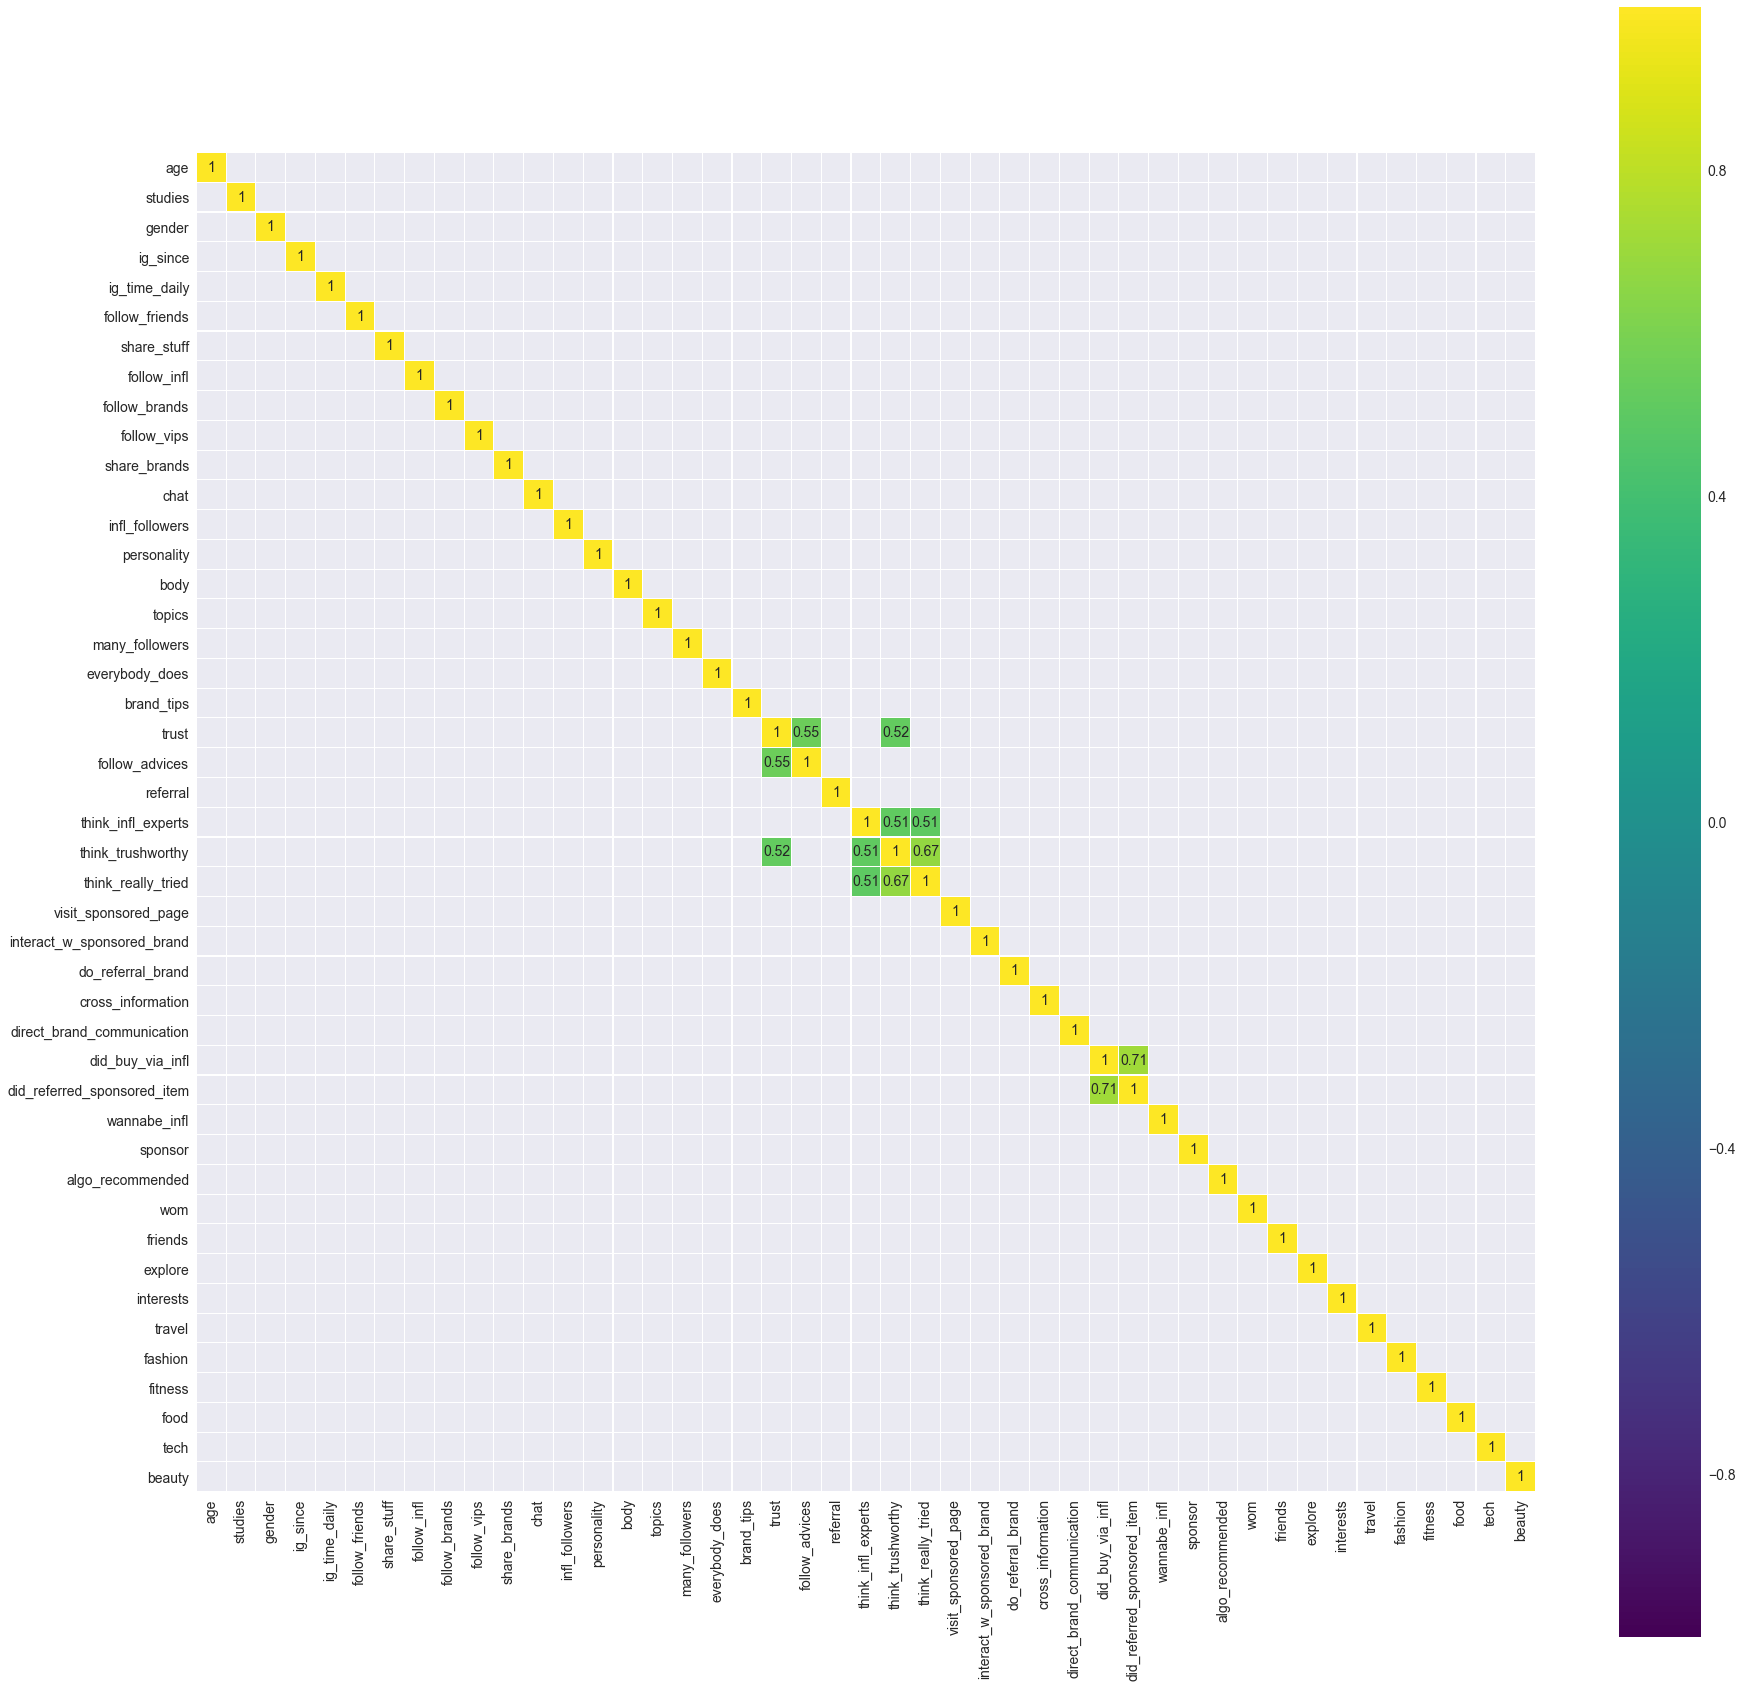

In [20]:
corr = df.corr() 
plt.figure(figsize=(30, 30));
sns.set(font_scale=1.4)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);